# **Extraction of CSV Files**

In [1]:
import pandas as pd
df = pd.read_csv("Final_candlestick.csv") #csv_file 'Final_Candlestick is imported that we created in part1
df.head()

,Date,start_time,end_time,Open,High,Low,Close
0,20200901,9:05,9:35,11464.30,11510.00,11370.10,11496.65
1,20200901,9:35,10:05,11496.85,11507.30,11366.90,11405.80
2,20200901,10:05,10:35,11404.70,11452.95,11394.05,11436.65
3,20200901,10:35,11:05,11435.90,11464.90,11426.45,11447.50
4,20200901,11:05,11:35,11446.95,11457.55,11391.10,11421.25


# **Candlesticks Formation**

In [2]:
import plotly.graph_objects as go                          # plotly use to plot candlestick chart
import datetime
from datetime import datetime

df['index'] = range(0, len(df) )
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')   #helps to convert string Date time into Python Date time object

fig = go.Figure(data=[go.Candlestick(x=df['index'],        #plotting the candlestick chart for all the 286(22*13) entries that we have got !
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

# **Possible Points of Hammer and Hanging Man**

In [3]:
df['Possible Pattern']=False

for i in range(0,286):
  a = min(df['Open'][i],df['Close'][i]) - df['Low'][i]    # this is the tail of the hammer below the main body of the hammer/hanging_man
  b = abs(df['Open'][i]-df['Close'][i]) + 0.000001        # to remove the divide by zero error  and 'b' signifies the length of the main body
  c =df['High'][i] - max(df['Open'][i],df['Close'][i])    # the upper part of the main body of the hammer/hanging_man  
  if (( a/b ) >2) and (c/b < 0.5):
    df['Possible Pattern'][i]=True

            
for i in range(0,286):                         

  if(df['Possible Pattern'][i]==True):
    print ( df['index'][i])                               # printing the index of the dataframe df where there is the possibility of having hammer or hanging_man

df

0
32
55
74
91
164
172
243
247
267
281


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,start_time,end_time,Open,High,Low,Close,index,Possible Pattern
0,2020-09-01,9:05,9:35,11464.30,11510.00,11370.10,11496.65,0,True
1,2020-09-01,9:35,10:05,11496.85,11507.30,11366.90,11405.80,1,False
2,2020-09-01,10:05,10:35,11404.70,11452.95,11394.05,11436.65,2,False
3,2020-09-01,10:35,11:05,11435.90,11464.90,11426.45,11447.50,3,False
4,2020-09-01,11:05,11:35,11446.95,11457.55,11391.10,11421.25,4,False
...,...,...,...,...,...,...,...,...,...
281,2020-09-30,13:05,13:35,11274.35,11275.45,11241.80,11263.70,281,True
282,2020-09-30,13:35,14:05,11264.55,11280.15,11252.55,11274.85,282,False
283,2020-09-30,14:05,14:35,11274.65,11295.40,11267.15,11285.55,283,False
284,2020-09-30,14:35,15:05,11286.30,11288.10,11247.05,11262.60,284,False


# **Installation of Trendet Library**

In [4]:
!pip install trendet==0.7

# **Detection of Trend (Upward and Downward)**

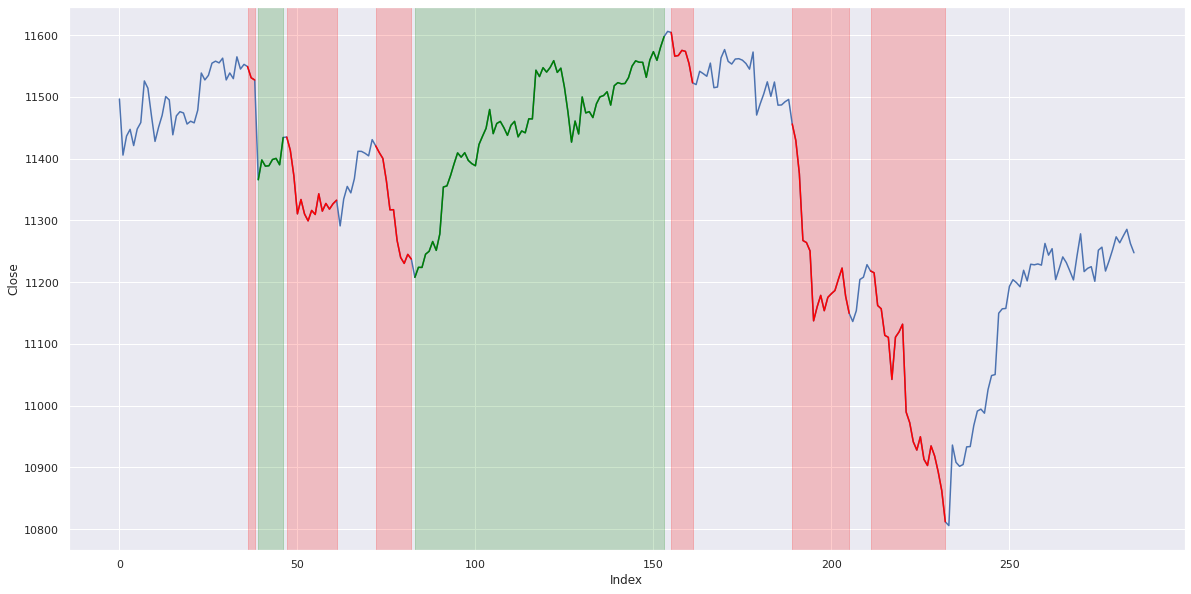

In [5]:
import trendet 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='darkgrid')

dff=df


df = trendet.identify_df_trends(df=dff , column='Close', window_size=8, identify='both') 


#print(df['Up Trend'].values)
df.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df.index, y=df['Close'])
ax.set(xlabel='Index')

labels = df['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Up Trend'] == label].index,
                 y=df[df['Up Trend'] == label]['Close'],
                 color='green')
 
    ax.axvspan(df[df['Up Trend'] == label].index[0],
               df[df['Up Trend'] == label].index[-1],
               alpha=0.2,
               color='green')
 
labels = df['Down Trend'].dropna().unique().tolist()
 
for label in labels:
    sns.lineplot(x=df[df['Down Trend'] == label].index,
                 y=df[df['Down Trend'] == label]['Close'],
                 color='red')
 
    ax.axvspan(df[df['Down Trend'] == label].index[0],
               df[df['Down Trend'] == label].index[-1],
               alpha=0.2,
               color='red')


In [6]:
df.head(248)

,level_0,Date,start_time,end_time,Open,High,Low,Close,index,Possible Pattern,Up Trend,Down Trend
0,0,2020-09-01,9:05,9:35,11464.30,11510.00,11370.10,11496.65,0,True,NaN,NaN
1,1,2020-09-01,9:35,10:05,11496.85,11507.30,11366.90,11405.80,1,False,NaN,NaN
2,2,2020-09-01,10:05,10:35,11404.70,11452.95,11394.05,11436.65,2,False,NaN,NaN
3,3,2020-09-01,10:35,11:05,11435.90,11464.90,11426.45,11447.50,3,False,NaN,NaN
4,4,2020-09-01,11:05,11:35,11446.95,11457.55,11391.10,11421.25,4,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,2020-09-25,13:35,14:05,10994.45,10995.80,10960.55,10987.65,243,True,NaN,NaN
244,244,2020-09-25,14:05,14:35,10987.20,11050.15,10987.05,11025.80,244,False,NaN,NaN
245,245,2020-09-25,14:35,15:05,11026.65,11072.60,11026.55,11048.65,245,False,NaN,NaN
246,246,2020-09-25,15:05,15:35,11048.95,11065.35,11032.95,11050.25,246,False,NaN,NaN


# **Detection of Hammer and Hanging Man**

In [7]:
df['Hanging Man'] = False
df['Hammer'] = False
df['Up Trend'] = df['Up Trend'].fillna(0)   #NaN values was replaced by 0
df['Down Trend'] = df['Down Trend'].fillna(0)  #NaN values was replaced by 0
for i in range(0,286):
  if(df['Possible Pattern'][i]==True):
    if(df['Up Trend'][i]!=0):
      df['Hanging Man'][i] = True
      print('hanging')
      print(i)
    if(df['Down Trend'][i]!=0):
      df['Hammer'][i] = True
      print('hammer')
      print(i)

hammer
55
hammer
74
hanging
91


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
df.head(50)

,level_0,Date,start_time,end_time,Open,High,Low,Close,index,Possible Pattern,Up Trend,Down Trend,Hanging Man,Hammer
0,0,2020-09-01,9:05,9:35,11464.30,11510.00,11370.10,11496.65,0,True,0,0,False,False
1,1,2020-09-01,9:35,10:05,11496.85,11507.30,11366.90,11405.80,1,False,0,0,False,False
2,2,2020-09-01,10:05,10:35,11404.70,11452.95,11394.05,11436.65,2,False,0,0,False,False
3,3,2020-09-01,10:35,11:05,11435.90,11464.90,11426.45,11447.50,3,False,0,0,False,False
4,4,2020-09-01,11:05,11:35,11446.95,11457.55,11391.10,11421.25,4,False,0,0,False,False
5,5,2020-09-01,11:35,12:05,11421.75,11495.95,11413.05,11448.10,5,False,0,0,False,False
6,6,2020-09-01,12:05,12:35,11447.85,11468.90,11435.60,11458.50,6,False,0,0,False,False
7,7,2020-09-01,12:35,13:05,11458.15,11535.55,11456.35,11525.95,7,False,0,0,False,False
8,8,2020-09-01,13:05,13:35,11525.70,11553.55,11503.80,11514.15,8,False,0,0,False,False
9,9,2020-09-01,13:35,14:05,11514.40,11524.00,11452.45,11469.50,9,False,0,0,False,False


# **Code for Return**

In [9]:
"""First we buy the stock when there was hammer point. 
Then we sell that stock when hanging point is detected 
provided we have buy any stock earlier. 
Consecutive Buy and sell signal are neglected"""
buy =0
sell =0
profit =0
for i in range(0,286):
  if(df['Hammer'][i]==True and sell==0 and buy==0):
    buy = df['Low'][i]
    print("Buy", buy)
   
  if(df['Hanging Man'][i]==True and buy!=0):
    sell = df['High'][i]
    print("Sell", sell)
    
    profit += sell-buy
    sell=0
    buy =0

print("Profit", profit)

Buy 11292.7
Sell 11367.35
Profit 74.64999999999964
